## baseline

In [1]:
import pickle
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
experiment_path='/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_04_03_24_run_1-screw'

with open(experiment_path + "/all_trainscores.pkl", "rb") as file:
    guide_trainscores = pickle.load(file)
with open(experiment_path + "/all_testscores.pkl", "rb") as file:
    guide_testscores = pickle.load(file)
with open(experiment_path + "/experiment_paths.json", 'r') as file:
    exppath_guide = json.load(file)   


exppath_guide_contam_paths= [path  for path in exppath_guide['test'] if 'good' not in path]

guide_allpaths=exppath_guide['train']+ exppath_guide_contam_paths+ exppath_guide['test']
guide_allscores=guide_trainscores.tolist()+[-1]*len(exppath_guide_contam_paths)+ guide_testscores.tolist()

anotype_marker={'good':'.','manipulated_front':'x','scratch_head':'^','scratch_neck':'s','thread_side':'p','thread_top':'D'}
anocolor={'good':'blue','manipulated_front':'green','scratch_head':'red','scratch_neck':'dodgerblue','thread_side':'purple','thread_top':'olive'}
anocolor_clean={'good':'skyblue','manipulated_front':'lightgreen','scratch_head':'orchid','scratch_neck':'aquamarine','thread_side':'mediumpurple','thread_top':'lime'}



anotype=['good']*len(guide_allscores)
for key in anotype_marker.keys():
    anotype=[key if key in path else anotype[i] for i,path in enumerate(guide_allpaths)]
color=[anocolor[key] for key in anotype]
color_clean=[anocolor_clean[key] for key in anotype]

marker=[anotype_marker[key] for key in anotype]  
df=pd.DataFrame({'guide_paths':guide_allpaths,"markers":marker,'anocolor':color,'anocolor_clean':color_clean,'clean_1':guide_allscores})


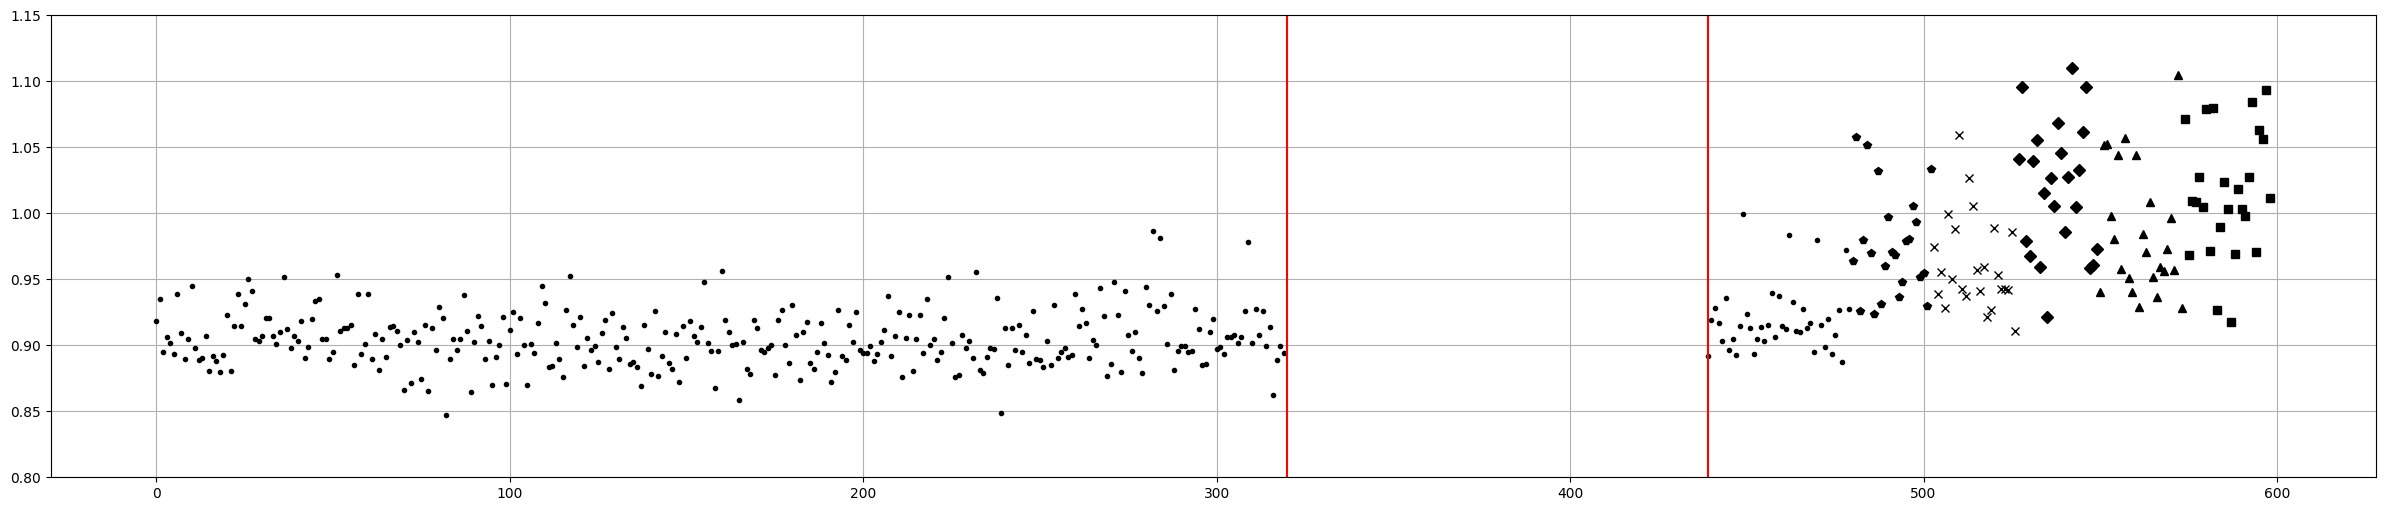

In [3]:
plt.figure(figsize=(30, 6))
for i in range(len(df)):
    plt.plot(df.index[i], df['clean_1'][i],  color='black', marker=df['markers'][i])

plt.ylim(0.8,1.15)
plt.vlines(len(guide_trainscores), 0.8, 1.15, color='red')
plt.vlines(len(guide_trainscores)+len(exppath_guide_contam_paths), 0.8, 1.15, color='red')
plt.grid(True)


#### clean full

In [30]:
filepaths=['/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_1-screw',
            '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_2-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_3-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_4-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_5-screw']


for i,path in enumerate(filepaths):
    with open(path + "/all_trainscores.pkl", "rb") as file:
        trainscores = pickle.load(file).tolist()
    with open(path + "/all_testscores.pkl", "rb") as file:
        testscores = pickle.load(file).tolist()
    with open(path + "/experiment_paths.json", 'r') as file:
        exppath = json.load(file)  
    
    sorted_train_idx=[exppath_guide['train'].index(path) for path in exppath['train']]
    sorted_test_idx=[exppath_guide['test'].index(path) for path in exppath['test']]
    sorted_trainscores=[trainscores[i] for i in sorted_train_idx]
    sorted_testscores=[testscores[i] for i in sorted_test_idx]

    allscores=sorted_trainscores+[-1]*len(exppath_guide_contam_paths)+ sorted_testscores
    df[f'clean_{i+2}']=allscores

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   guide_paths     599 non-null    object 
 1   markers         599 non-null    object 
 2   anocolor        599 non-null    object 
 3   anocolor_clean  599 non-null    object 
 4   clean_1         599 non-null    float64
 5   clean_2         599 non-null    float64
 6   clean_3         599 non-null    float64
 7   clean_4         599 non-null    float64
 8   clean_5         599 non-null    float64
 9   clean_6         599 non-null    float64
dtypes: float64(6), object(4)
memory usage: 46.9+ KB


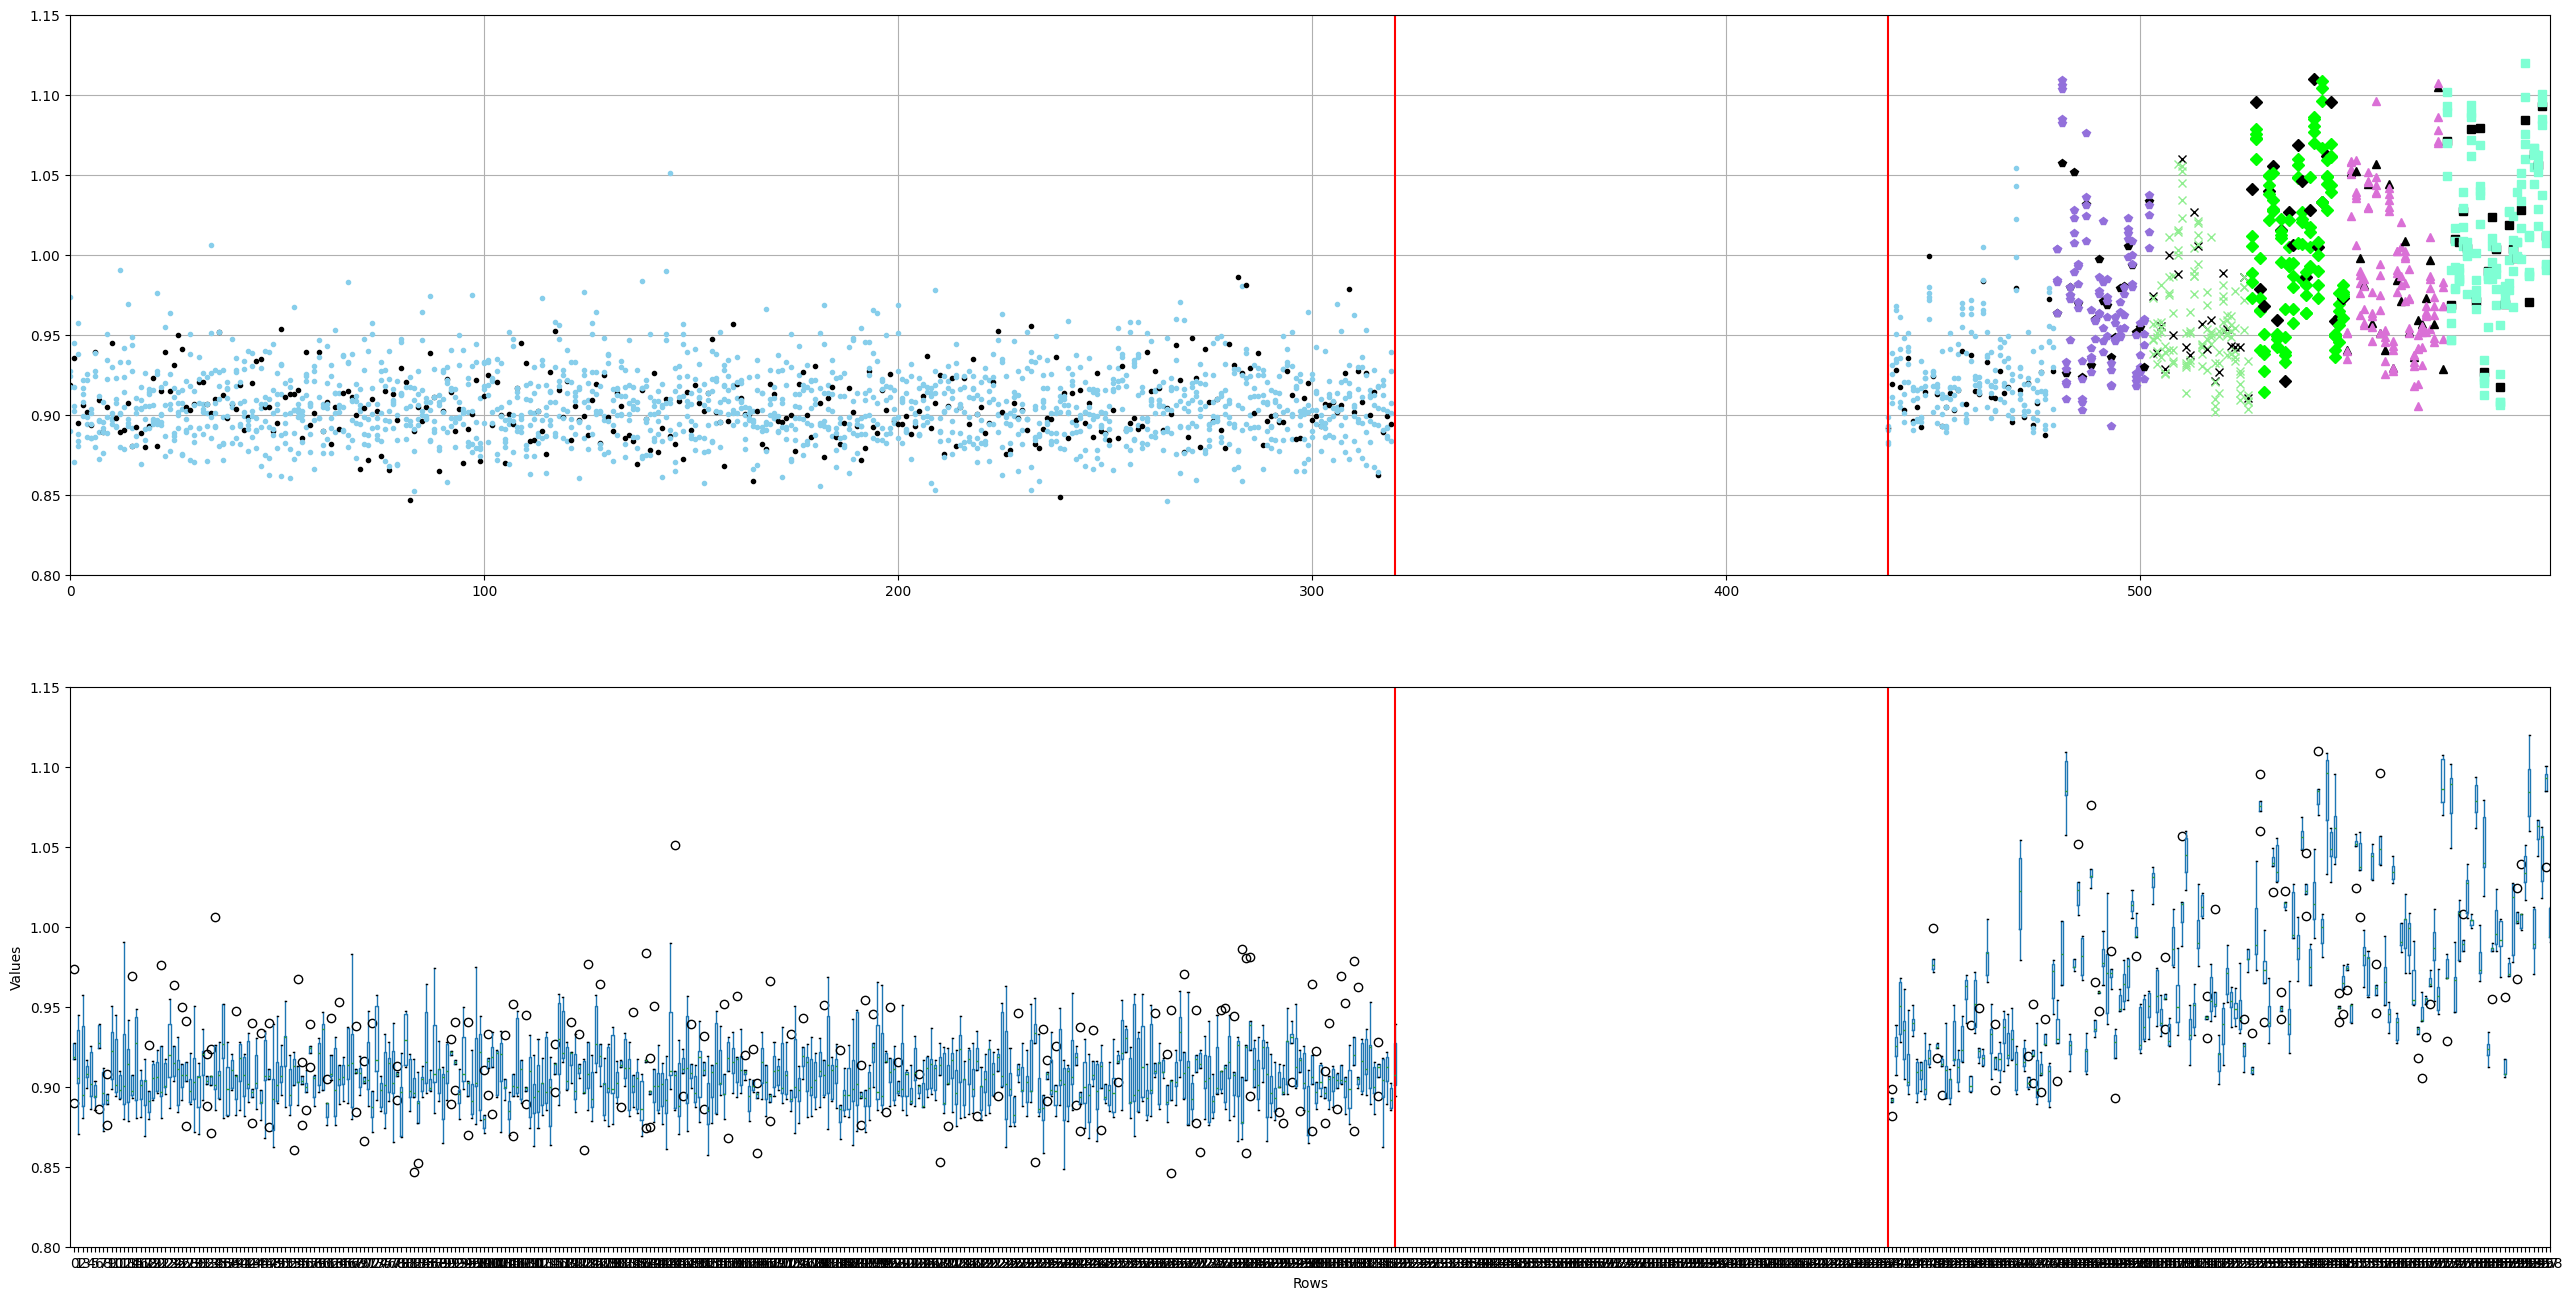

In [31]:
# Creating subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(32, 16))

# First subplot: Plotting data points
for i in range(len(df)):
    ax1.plot(df.index[i], df['clean_1'][i],   marker=df['markers'][i],color='black')
    ax1.plot(df.index[i], df['clean_2'][i],  marker=df['markers'][i],color=df['anocolor_clean'][i])
    ax1.plot(df.index[i], df['clean_3'][i],  marker=df['markers'][i],color=df['anocolor_clean'][i])
    ax1.plot(df.index[i], df['clean_4'][i],  marker=df['markers'][i],color=df['anocolor_clean'][i])
    ax1.plot(df.index[i], df['clean_5'][i], marker=df['markers'][i],color=df['anocolor_clean'][i])
    ax1.plot(df.index[i], df['clean_6'][i], marker=df['markers'][i],color=df['anocolor_clean'][i])
    
ax1.set_ylim(0.8, 1.15)
ax1.set_xlim(0, len(df))
ax1.vlines(len(guide_trainscores), 0.8, 1.15, color='red')
ax1.vlines(len(guide_trainscores) + len(exppath_guide_contam_paths), 0.8, 1.15, color='red')
ax1.grid(True)

df_transposed = df[['clean_1', 'clean_2', 'clean_3', 'clean_4', 'clean_5']].T
df_transposed.boxplot(ax=ax2)
ax2.set_ylim(0.8, 1.15)
ax2.set_xlim(0, len(df))
ax2.vlines(len(guide_trainscores), 0.8, 1.15, color='red')
ax2.vlines(len(guide_trainscores) + len(exppath_guide_contam_paths), 0.8, 1.15, color='red')
ax2.set_xlabel('Rows')
ax2.set_ylabel('Values')
ax2.grid(False)

plt.show()

In [33]:
filepaths_cont=['/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_1-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_2-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_3-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_4-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_5-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_6-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_7-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_8-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_9-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_10-screw']

# TODO add contam scores to the set 


for i,path in enumerate(filepaths_cont):
    
    print(path)
    with open(path + "/all_trainscores.pkl", "rb") as file:
        trainscores = pickle.load(file).tolist()
        
    with open(path + "/all_testscores.pkl", "rb") as file:
        testscores = pickle.load(file).tolist()
        
    with open(path + "/all_trainscores_clean.pkl", "rb") as file:
        trainscores_clean = pickle.load(file).tolist()
    
    with open(path + "/all_testscores_clean.pkl", "rb") as file:
        testscores_clean = pickle.load(file).tolist()
        
    with open(path + "/experiment_paths.json", 'r') as file:
        exppath = json.load(file)  
    
    
    
    # clean test
    testdf={}
    for k,v in zip(exppath['test'],testscores_clean):
        testdf[k]=v
    sorted_testscores_clean=[]
    for path in exppath_guide['test']:
        if path in testdf.keys():
            sorted_testscores_clean.append(testdf[path])
        else:
            sorted_testscores_clean.append(-1)
            
    # clean train
    sorted_train_clean_idx=[exppath_guide['train'].index(path) for path in exppath['clean_train']]        
    sorted_trainscores_clean=[trainscores_clean[i] for i in sorted_train_clean_idx]     

    allscores_clean=sorted_trainscores_clean+[-1]*len(exppath_guide_contam_paths)+ sorted_testscores_clean
    df[f'cont_clean_{i}']=allscores_clean
    
    # contam test
    test_contdf={}
    for k,v in zip(exppath['test'],testscores):
        test_contdf[k]=v    
        
    sorted_testscores_cont=[]
    for path in exppath_guide['test']:
        if path in test_contdf.keys():
            sorted_testscores_cont.append(test_contdf[path])
        else:
            sorted_testscores_cont.append(-1)
    # contam train 
    
    train_contdf={}
    for k,v in zip(exppath['train'],trainscores):
        train_contdf[k]=v 
    
    sorted_train_cont=[]
    for path in exppath_guide['train']+exppath_guide_contam_paths:
        if path in train_contdf.keys():
            sorted_train_cont.append(train_contdf[path])
        else:
            sorted_train_cont.append(-1)      
              
    allscores=sorted_train_cont+ sorted_testscores_cont
            
    df[f'cont_{i}']=allscores        
df.info()

/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_1-screw
/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_2-screw
/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_3-screw
/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_4-screw
/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_5-screw
/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_6-screw
/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_7-screw
/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_8-screw
/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_9-screw
/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_10-screw
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------

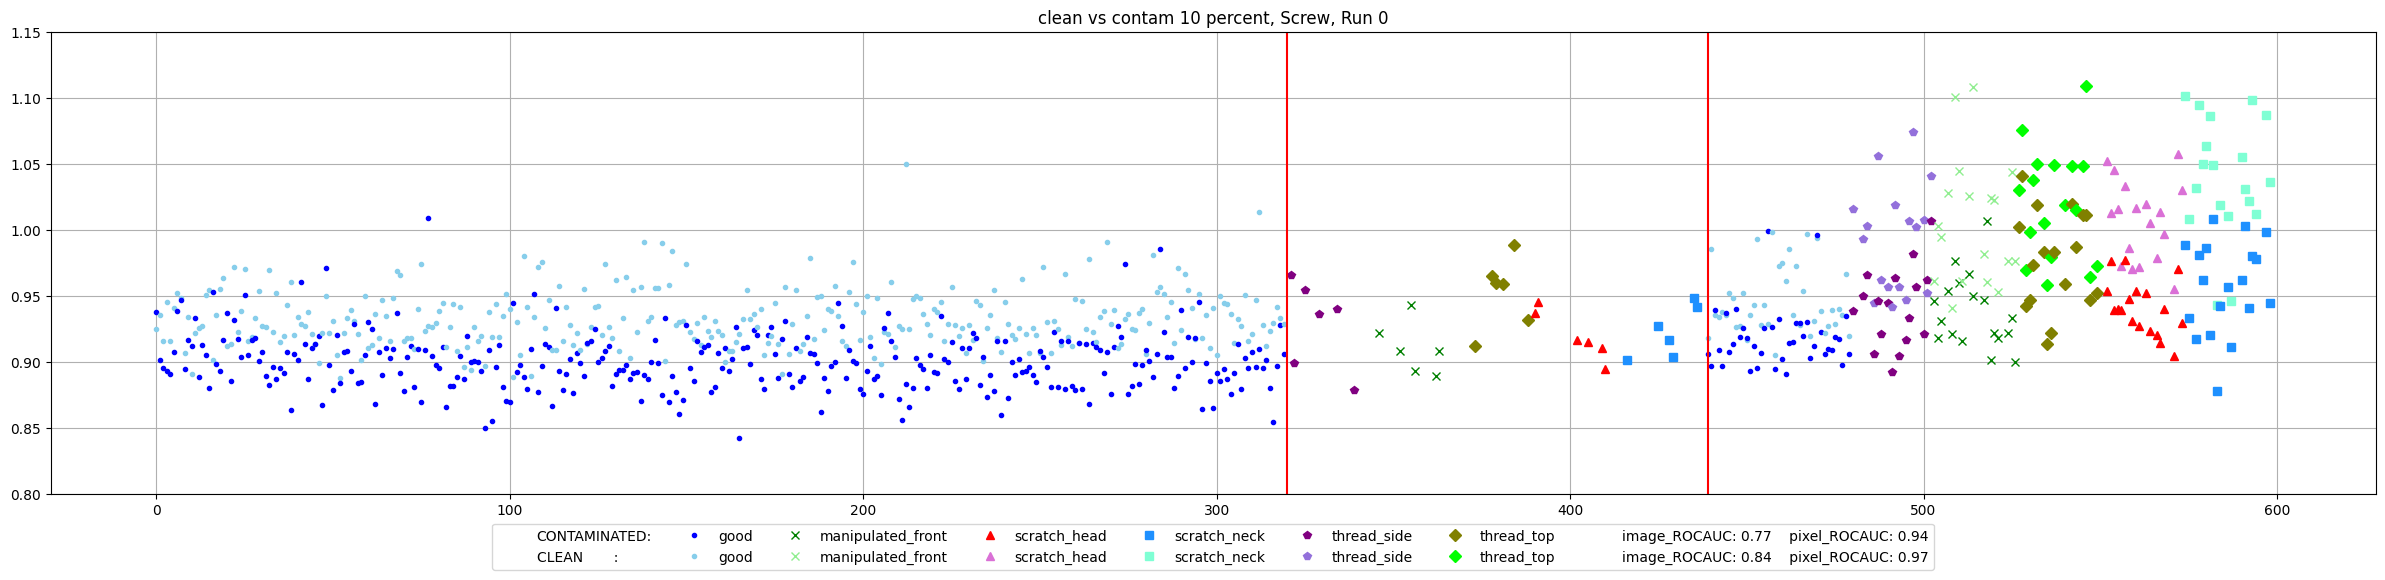

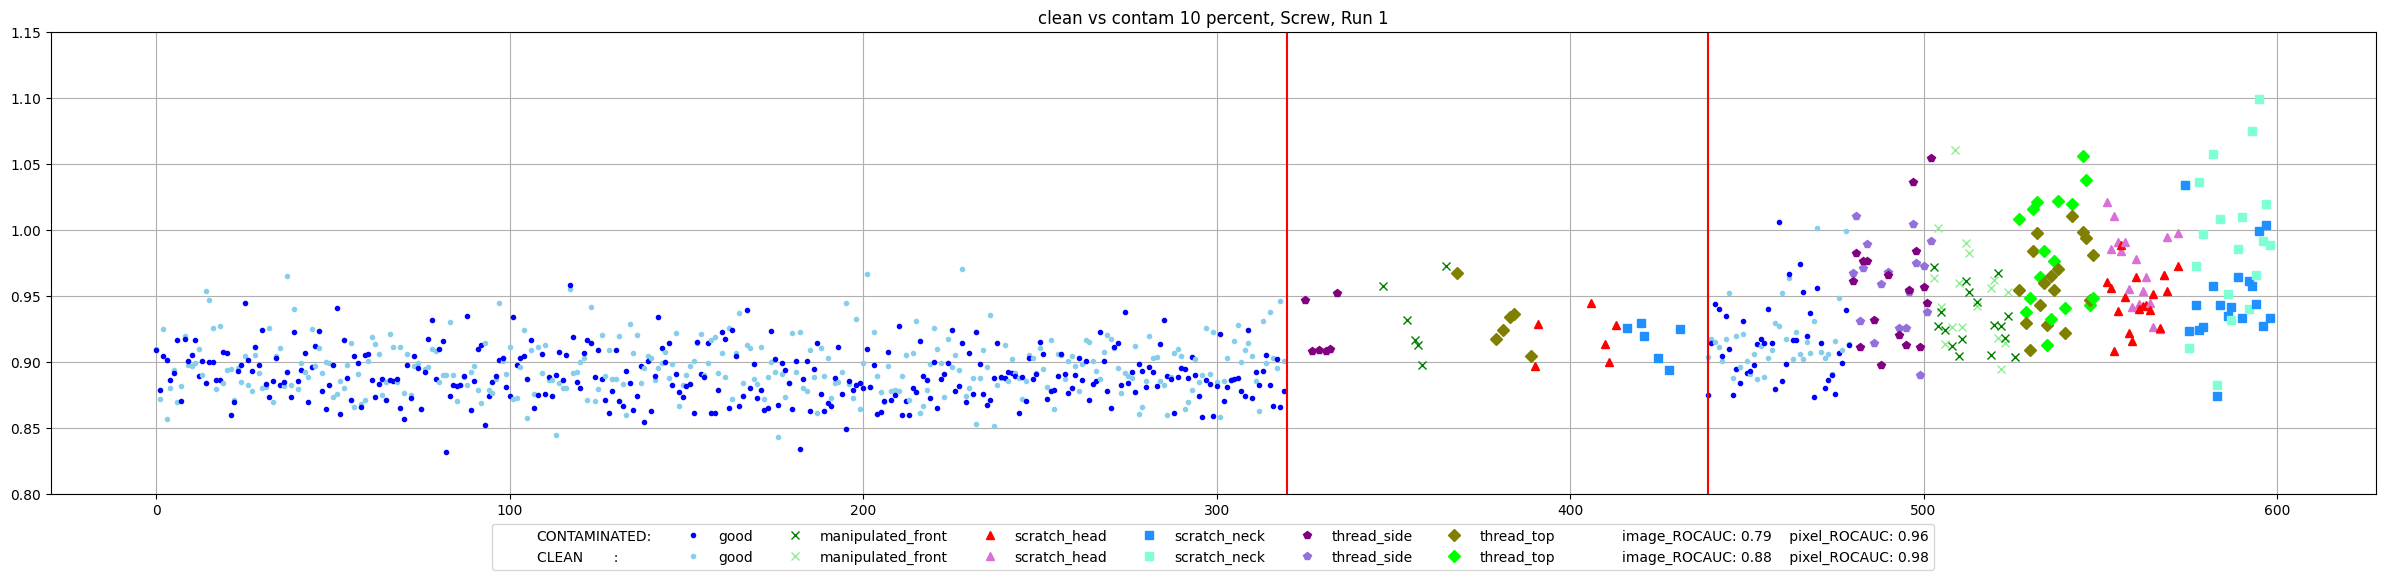

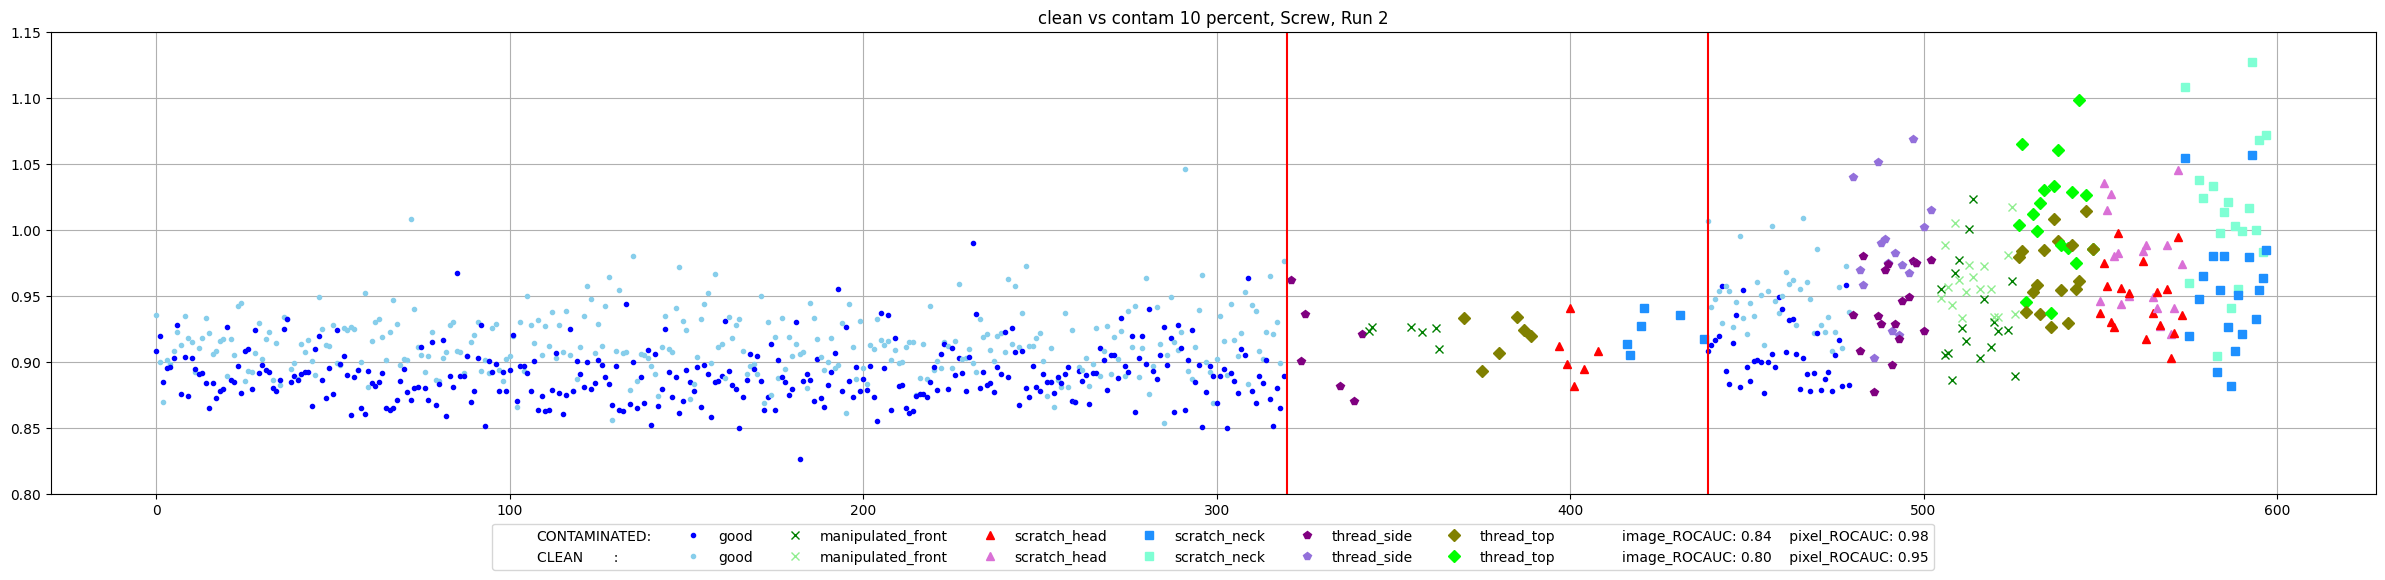

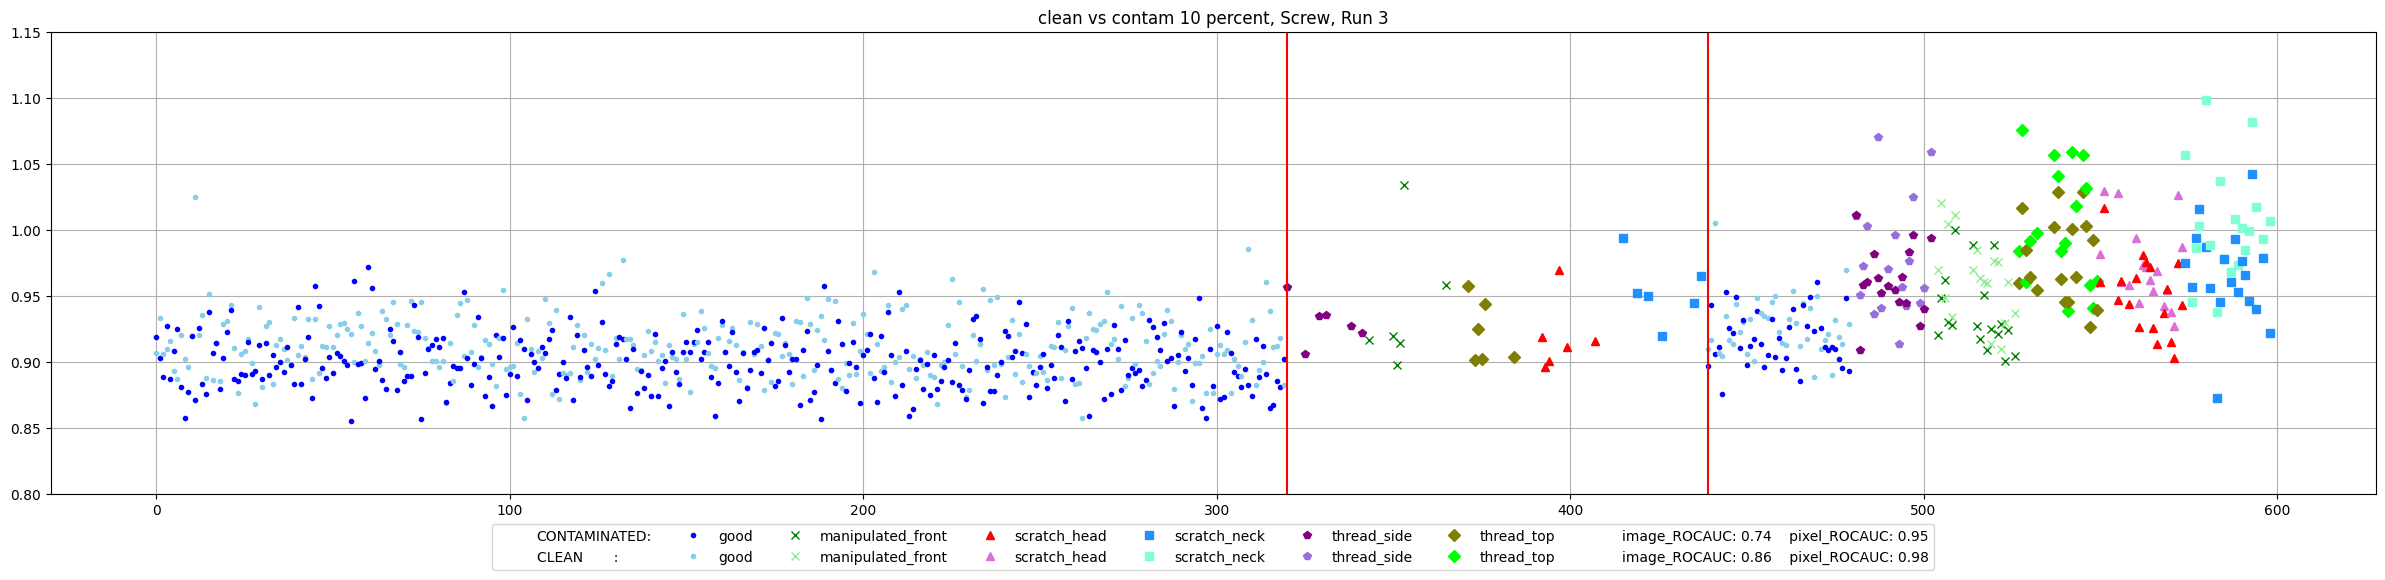

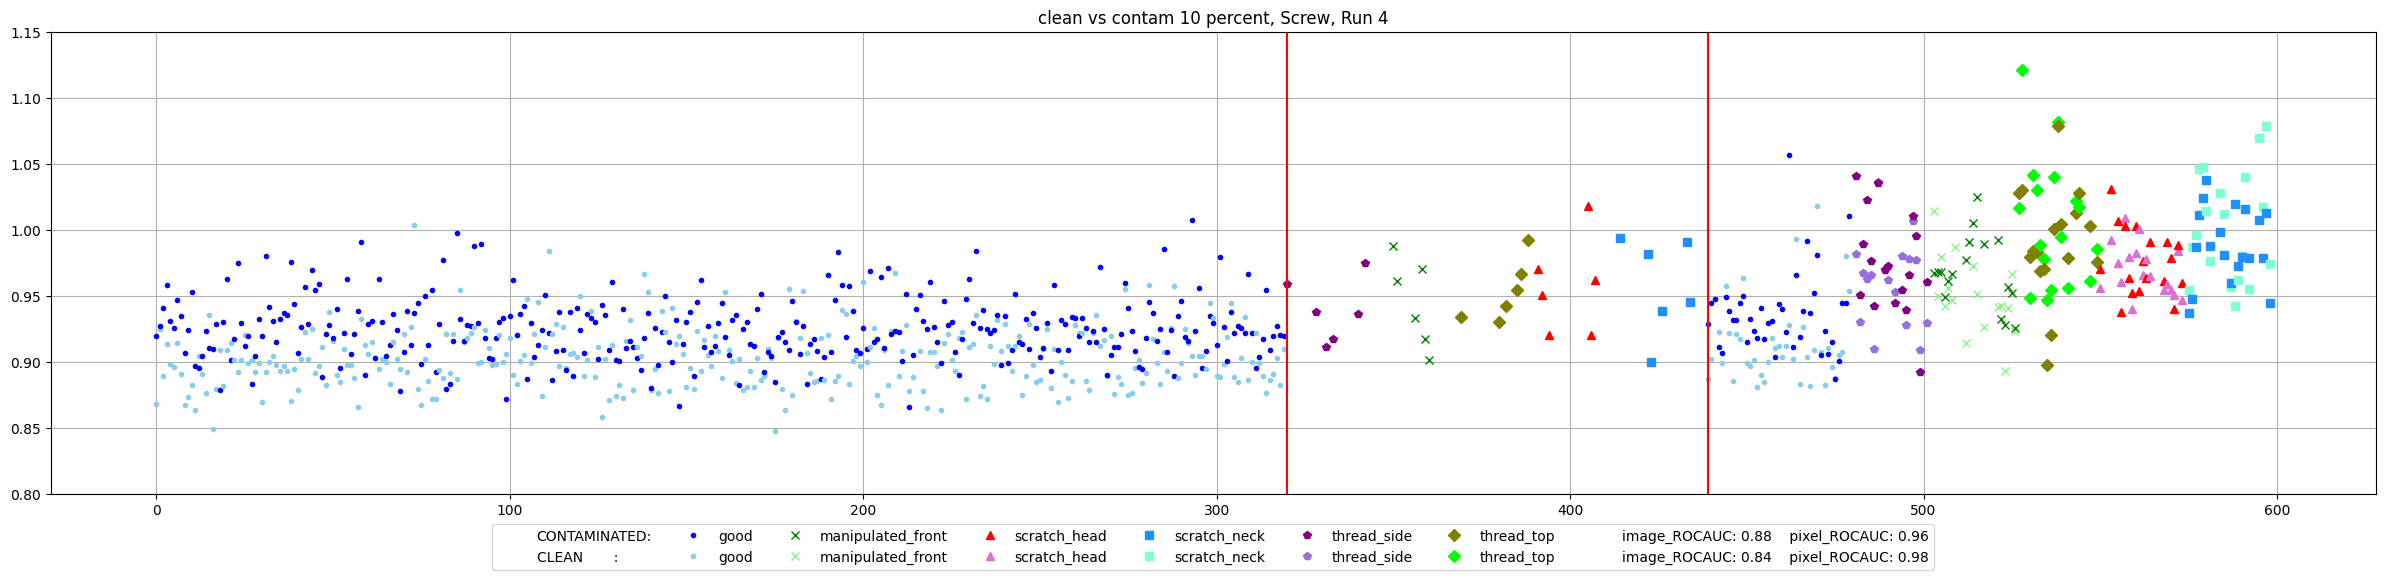

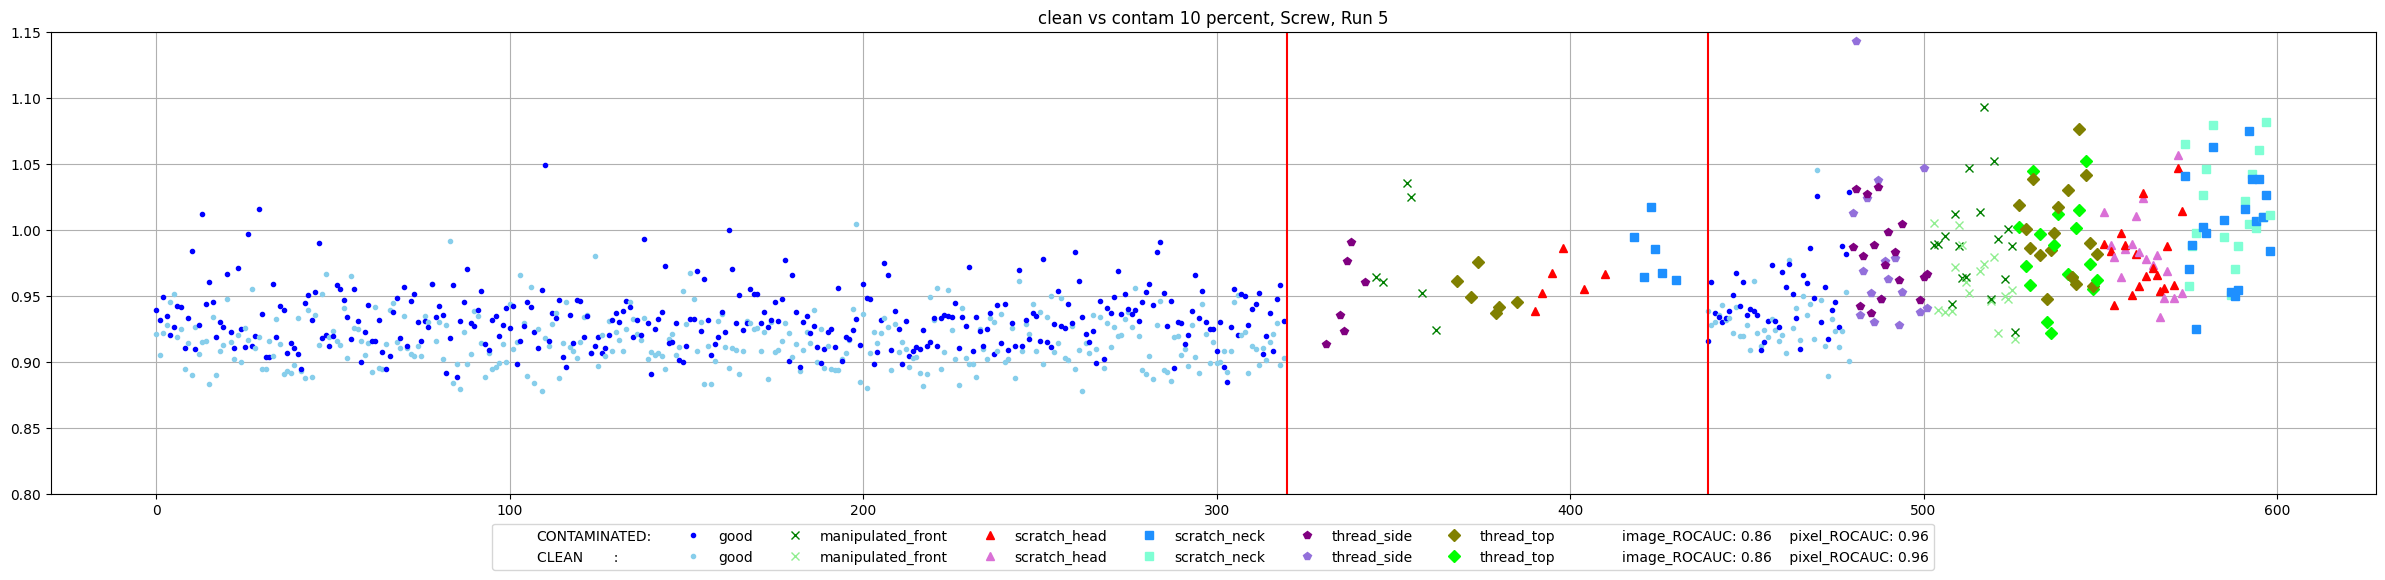

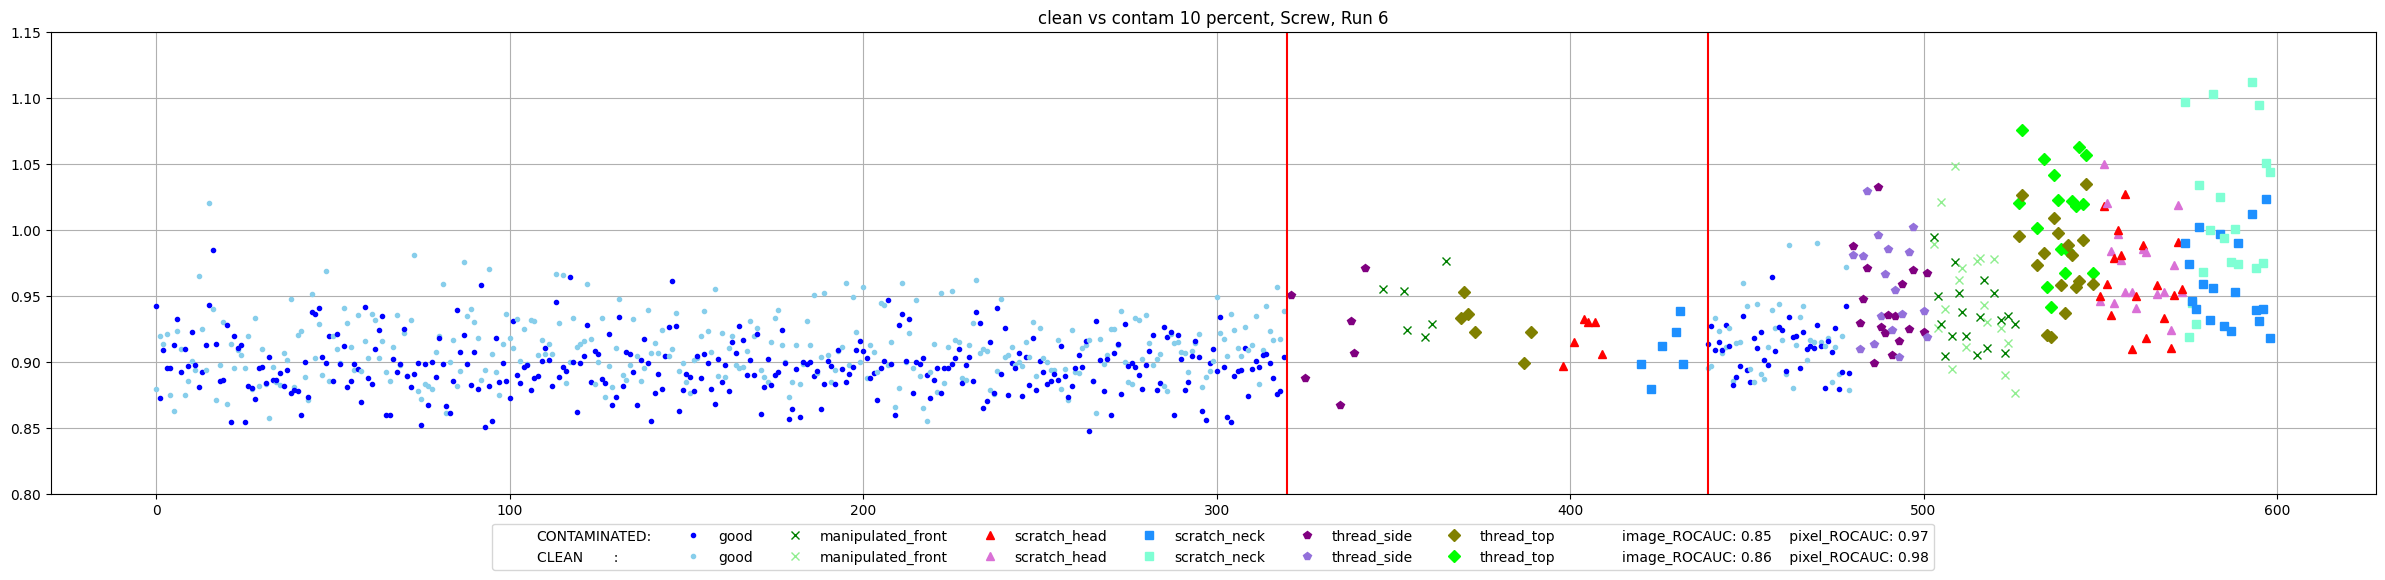

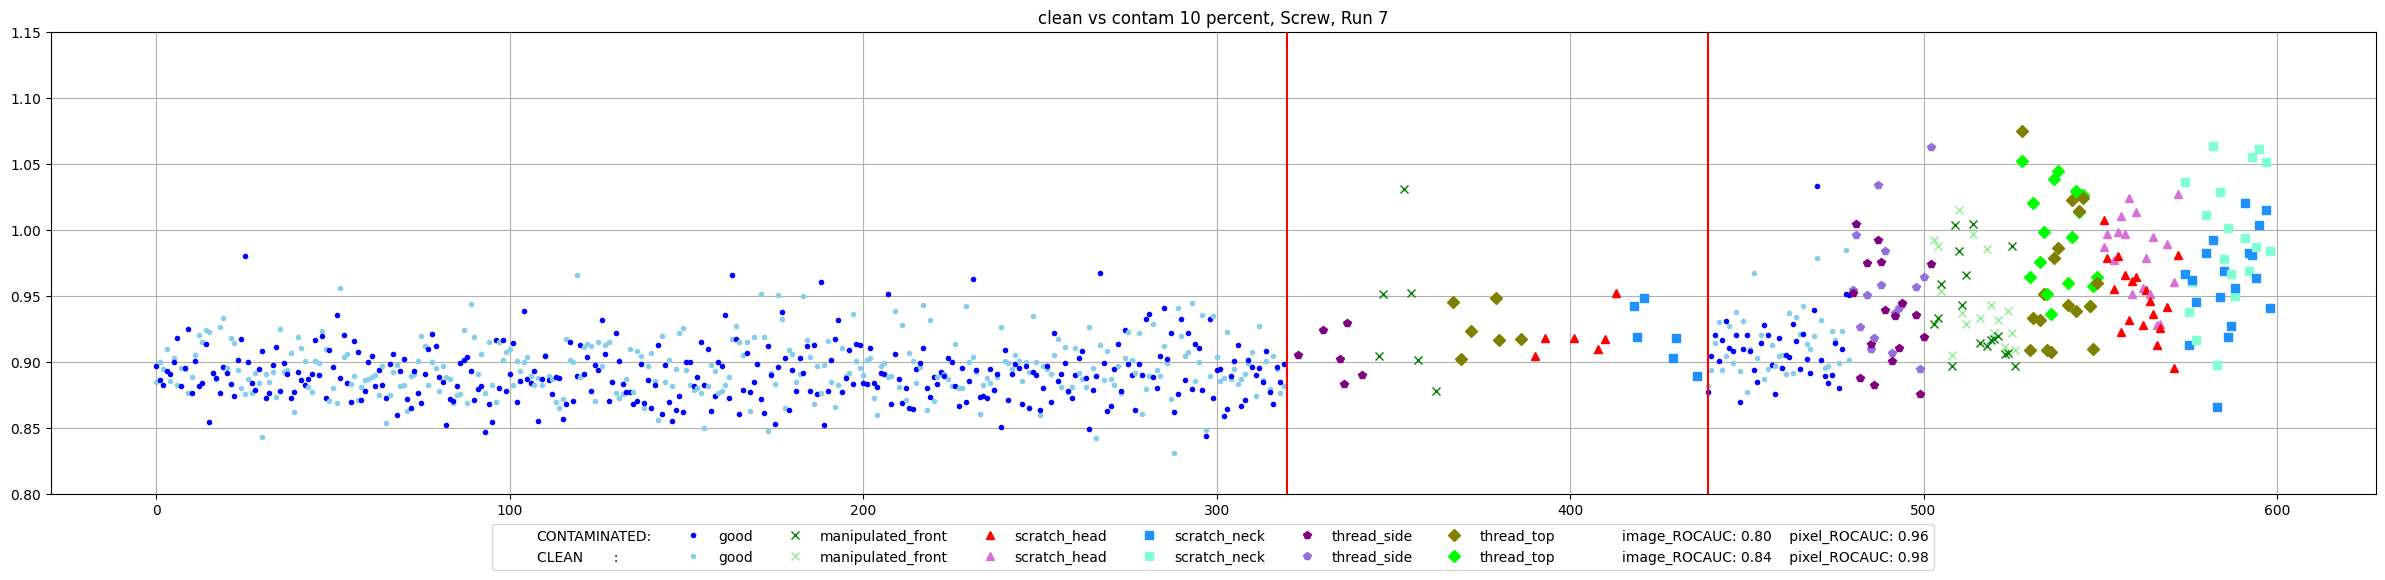

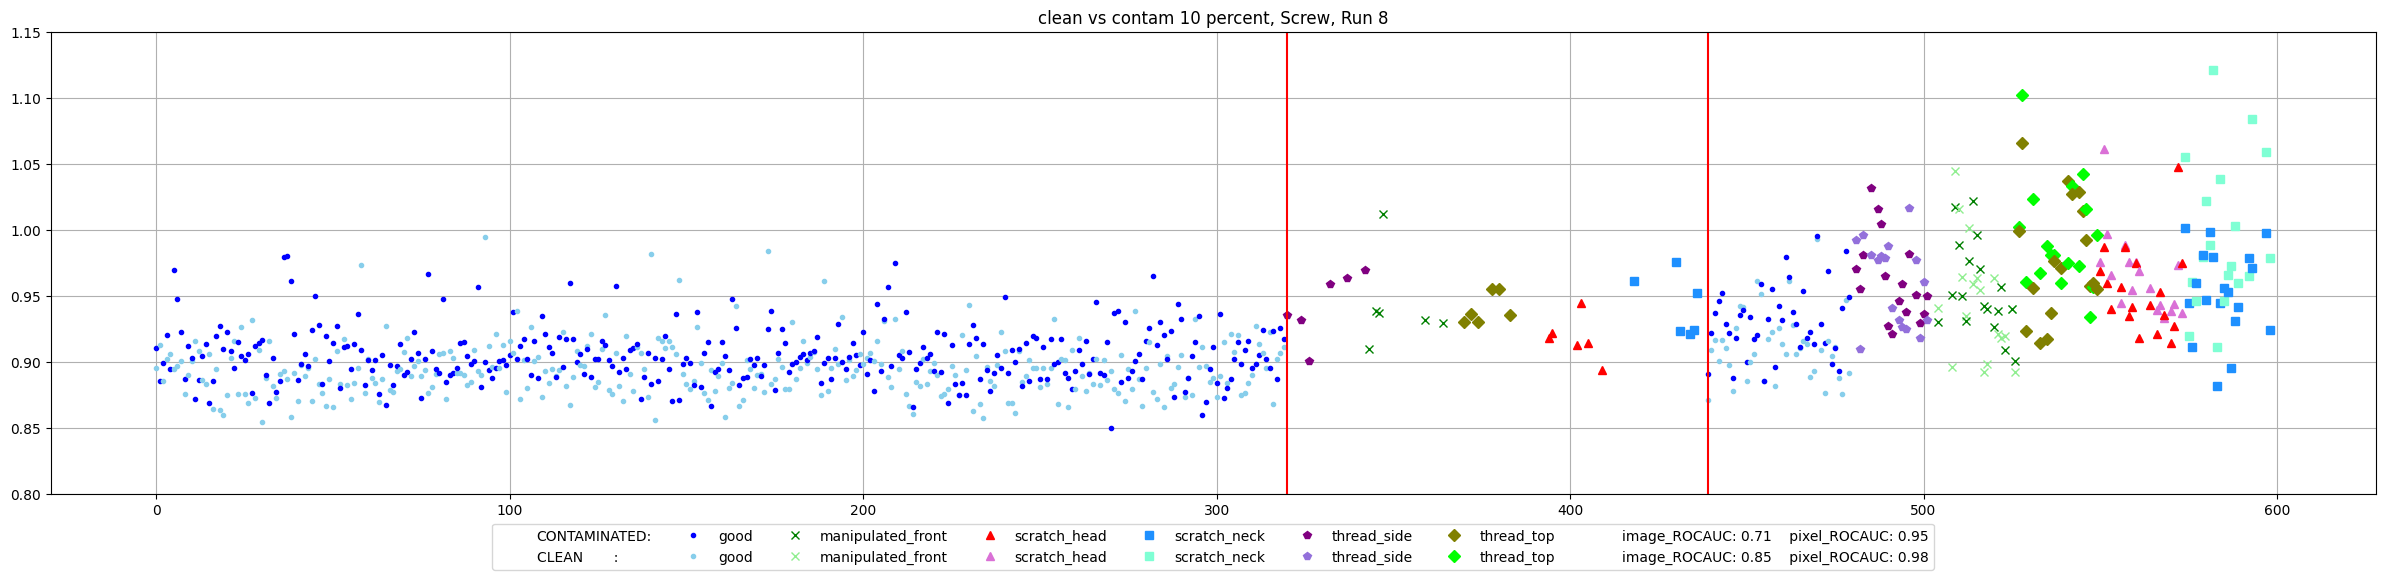

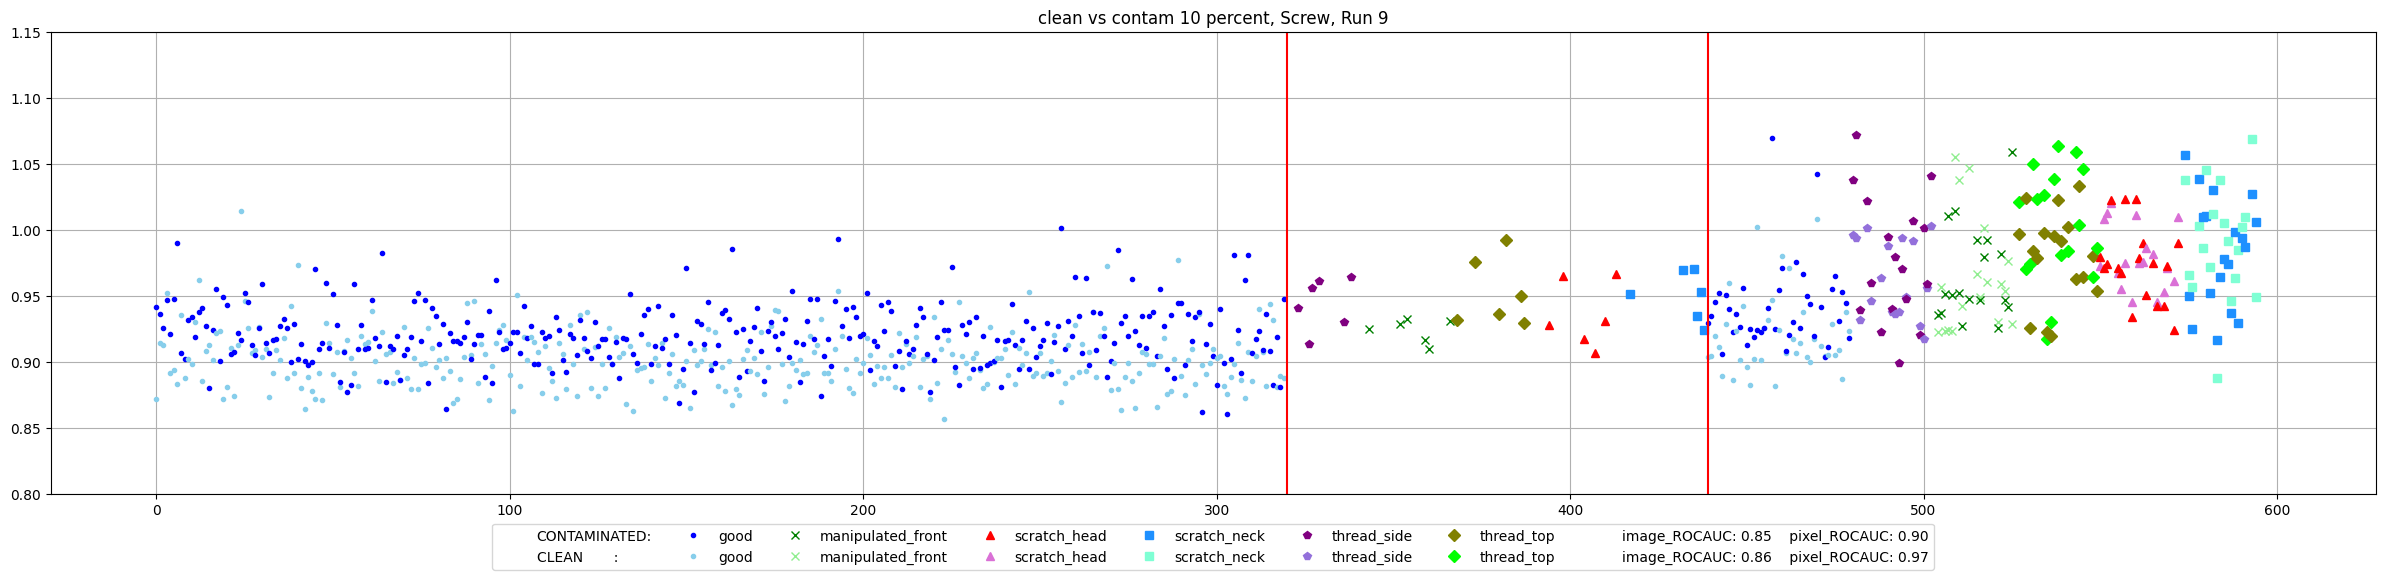

In [35]:
for run, path in enumerate(filepaths_cont): 
    plt.figure(figsize=(30, 6))
    for i in range(len(df)):
        plt.plot(df.index[i], df[f'cont_clean_{run}'][i], marker=df['markers'][i], color=df['anocolor_clean'][i])
        plt.plot(df.index[i], df[f'cont_{run}'][i], marker=df['markers'][i], color=df['anocolor'][i])
    plt.ylim(0.8, 1.15)
    plt.vlines(len(guide_trainscores), 0.8, 1.15, color='red')
    plt.vlines(len(guide_trainscores) + len(exppath_guide_contam_paths), 0.8, 1.15, color='red')
    plt.grid(True)
    plt.title(f'clean vs contam 10 percent, Screw, Run {run}')
    
    
    
    
    metrics = last_rows_metric([path+'/args.log', path+'/args_cleaned.log'])
    # Create custom legend
    legend_elements = []
    
    legend_elements.append(plt.Line2D([0], [0], color='white', label="CONTAMINATED:", linestyle='None'))
    legend_elements.append(plt.Line2D([0], [0], color='white', label="CLEAN       :", linestyle='None'))
    
    for label, marker in anotype_marker.items():
        legend_elements.append(plt.Line2D([0], [0], marker=marker, color=anocolor[label], label=f'{label}', linestyle='None'))
        legend_elements.append(plt.Line2D([0], [0], marker=marker, color=anocolor_clean[label], label=f'{label}', linestyle='None'))
        

    metrics_text = f"image_ROCAUC: {metrics['image_AUC'][0]:.2f}    pixel_ROCAUC: {metrics['pixel_AUC'][0]:.2f}"
    legend_elements.append(plt.Line2D([0], [0], color='white', label=metrics_text, linestyle='None'))
    
    metrics_text = f"image_ROCAUC: {metrics['image_AUC'][1]:.2f}    pixel_ROCAUC: {metrics['pixel_AUC'][1]:.2f}"
    legend_elements.append(plt.Line2D([0], [0], color='white', label=metrics_text, linestyle='None'))
    
    
    plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=8)

    plt.show()